In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [34]:
path = 'C:/Users/66626/Project/Data Set/'
file1 = path + 'olist_customers_dataset.csv'
file2 = path + 'olist_geolocation_dataset.csv'
file3 = path + 'olist_order_items_dataset.csv'
file4 = path + 'olist_order_payments_dataset.csv'
file5 = path + 'olist_order_reviews_dataset.csv'
file6 = path + 'olist_orders_dataset.csv'
file7 = path + 'olist_products_dataset.csv'
file8 = path + 'olist_sellers_dataset.csv'
file9 = path + 'product_category_name_translation.csv'

In [35]:
df_customers = pd.read_csv(file1)
df_geolocation = pd.read_csv(file2)
df_item = pd.read_csv(file3)
df_order_pay = pd.read_csv(file4)
df_reviews = pd.read_csv(file5)
df_orders = pd.read_csv(file6)
df_products = pd.read_csv(file7)
df_sellers = pd.read_csv(file8)
df_category = pd.read_csv(file9)

In [36]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [37]:
df_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [38]:
print('Cities with Sales: ', df_customers.customer_city.nunique())
print('States with Sales: ', df_customers.customer_state.nunique())
print(str.format('Average Number of Cities per State: {:.0f}', df_customers.groupby(by='customer_state').customer_city.value_counts().mean()))

Cities with Sales:  4119
States with Sales:  27
Average Number of Cities per State: 23


Text(0, 0.5, 'No. of Customers')

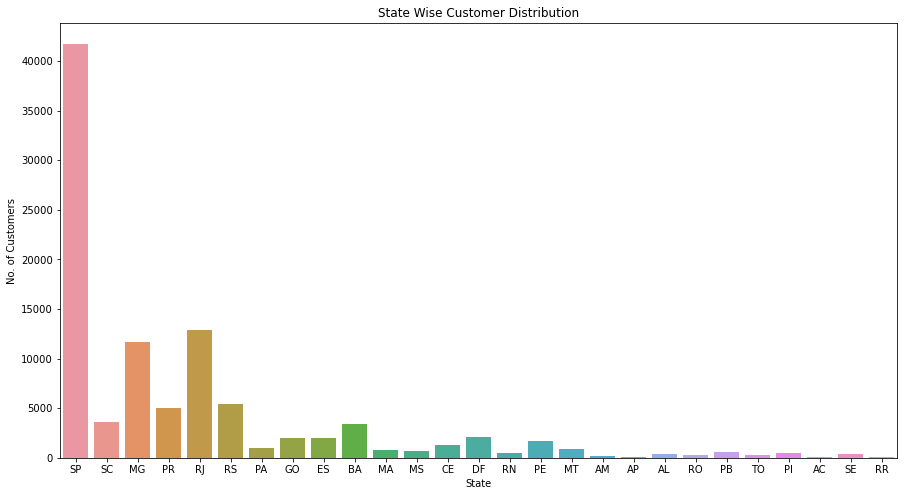

In [39]:
# plotting state wise customer distribution
plt.figure(figsize=(15,8))
sns.countplot(x='customer_state', data=df_customers)
plt.title('State Wise Customer Distribution')
plt.xlabel('State')
plt.ylabel('No. of Customers')

In [40]:
# viewing the first 5 rows of the dataset
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [41]:
df_geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [42]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df_geolocation['geolocation_lng'], df_geolocation['geolocation_lat'])]
gdf = GeoDataFrame(df_geolocation, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

ModuleNotFoundError: No module named 'shapely'

In [43]:
# viewing the first 5 rows of the dataset
df_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [44]:
# checking for missing values
df_item.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Text(0.5, 0, 'Price')

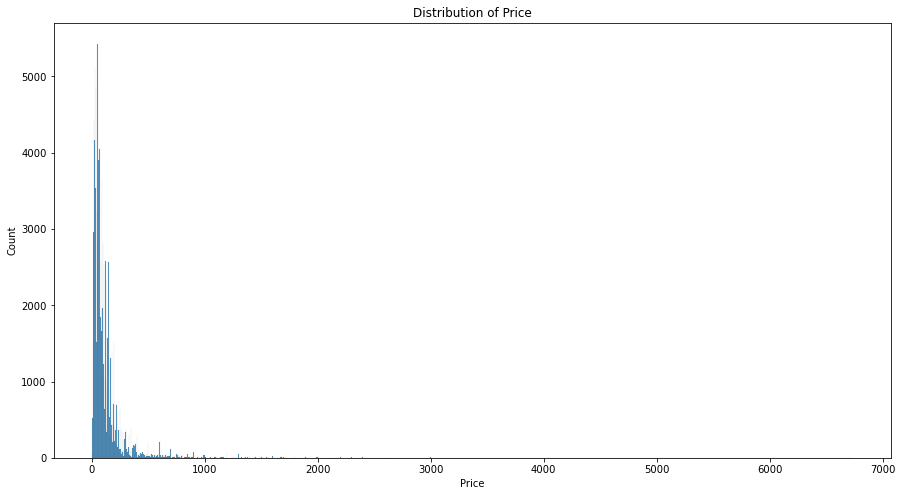

In [45]:
# plotting the distribution of price
plt.figure(figsize=(15,8))
sns.histplot(x='price', data=df_item)
plt.title('Distribution of Price')
plt.xlabel('Price')

Text(0.5, 0, 'Freight Value')

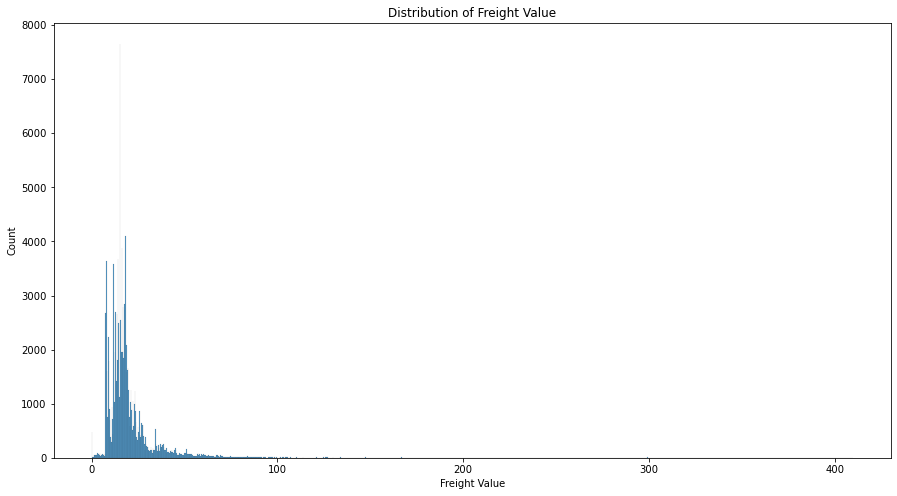

In [46]:
# plotting the distribution of freight value
plt.figure(figsize=(15,8))
sns.histplot(x='freight_value', data=df_item)
plt.title('Distribution of Freight Value')
plt.xlabel('Freight Value')

In [47]:
# viewing the first 5 rows of the dataset
df_order_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [48]:
# checking for missing values
df_order_pay.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Text(0, 0.5, 'No. of Customers')

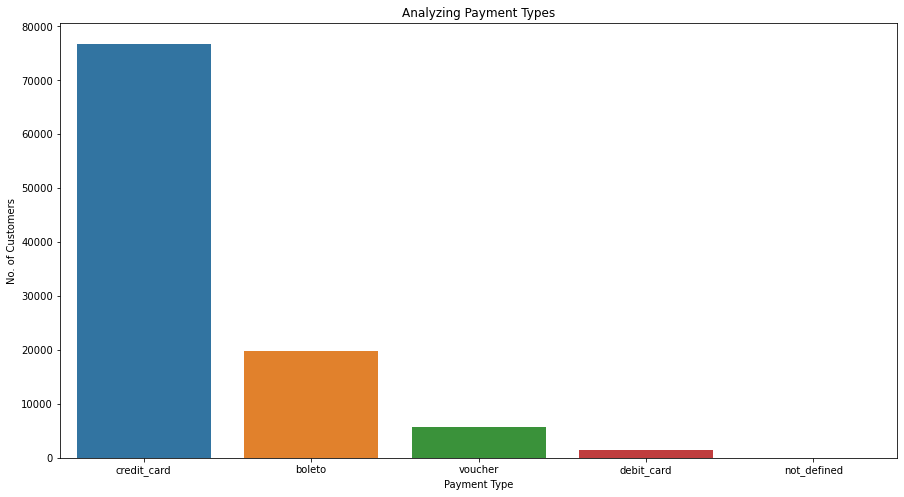

In [49]:
# analyzing the payment methods chosen by different customers
plt.figure(figsize=(15,8))
sns.countplot(x='payment_type', data=df_order_pay)
plt.title('Analyzing Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('No. of Customers')

In [50]:
# removing not_defined payment method
df_order_pay = df_order_pay.loc[df_order_pay['payment_type']!='not_defined', :]

Text(0, 0.5, 'No. of Customers')

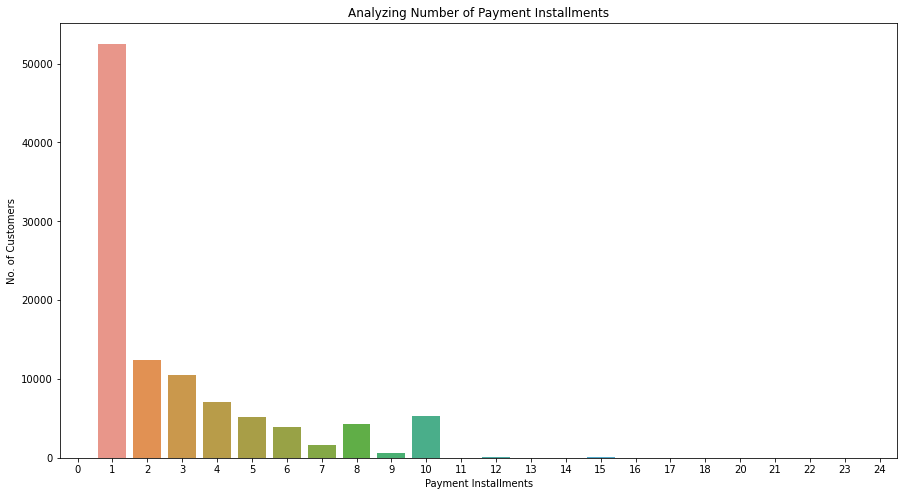

In [51]:
# plotting the distribution of number of installments
plt.figure(figsize=(15,8))
sns.countplot(x='payment_installments', data=df_order_pay)
plt.title('Analyzing Number of Payment Installments')
plt.xlabel('Payment Installments')
plt.ylabel('No. of Customers')

Text(0, 0.5, 'No. of Orders')

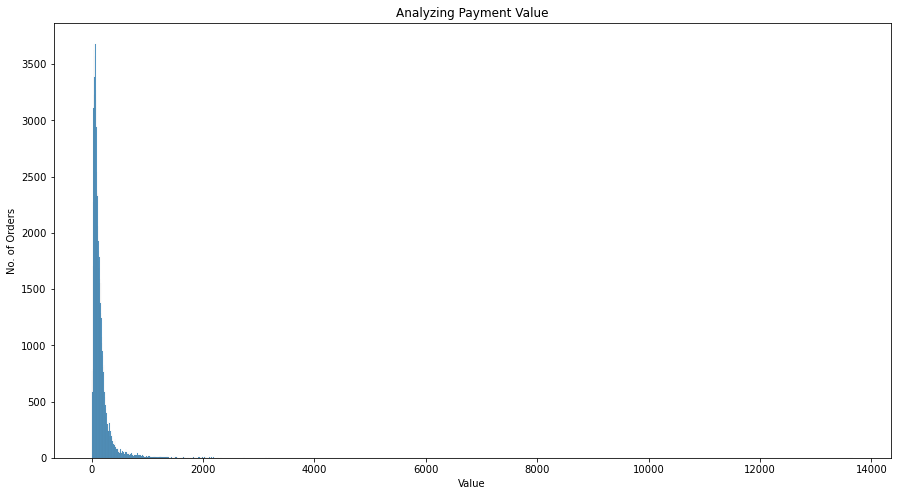

In [52]:
# plotting the distribution of payment value
plt.figure(figsize=(15,8))
sns.histplot(x='payment_value', data=df_order_pay)
plt.title('Analyzing Payment Value')
plt.xlabel('Value')
plt.ylabel('No. of Orders')

Text(0, 0.5, 'Amount Spent')

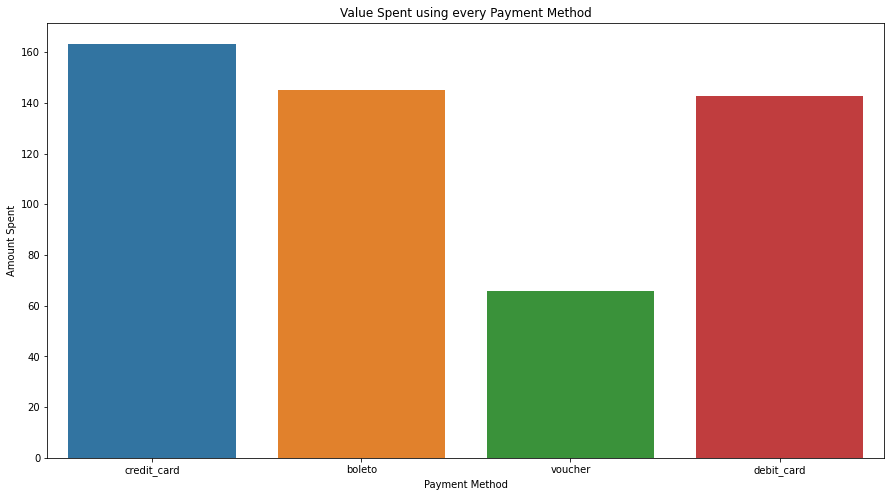

In [53]:
# analyzing amount paid by each payment method
plt.figure(figsize=(15,8))
sns.barplot(x='payment_type', y='payment_value', data=df_order_pay, ci=None)
plt.title('Value Spent using every Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Amount Spent')

In [54]:
# viewing the first 5 rows of the dataset
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [55]:
# checking for missing values
df_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [56]:
# viewing the dimensions of the dataset
df_reviews.shape

(100000, 7)

As we can see, the columns review_comment_title and review_comment_message have more than 50% missing values. Hence, we decide to drop these columns using the drop() function from the Pandas library.

In [57]:
# dropping columns with many missing values
df_reviews = df_reviews.drop(columns=['review_comment_title', 'review_comment_message'])

Text(0, 0.5, 'No. of Reviews')

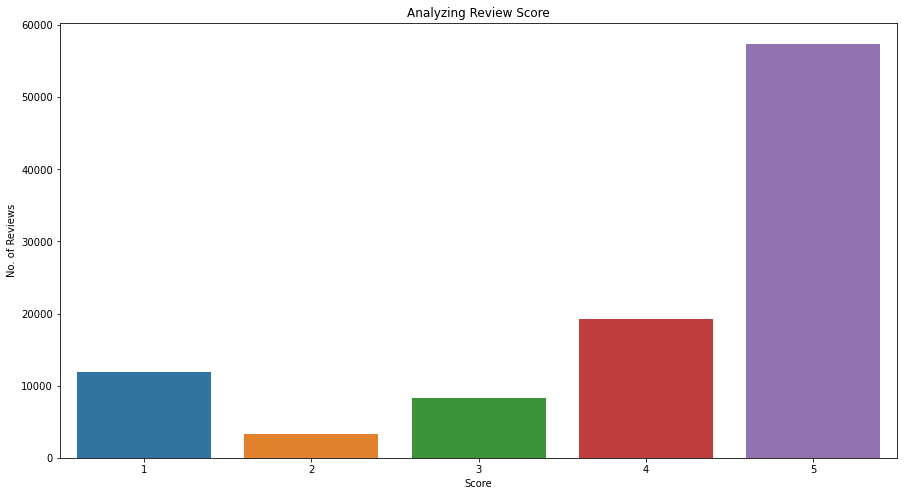

In [58]:
# analyzing the review score
plt.figure(figsize=(15,8))
sns.countplot(x='review_score', data=df_reviews)
plt.title('Analyzing Review Score')
plt.xlabel('Score')
plt.ylabel('No. of Reviews')

In [62]:
# viewing the first 5 rows of the dataset
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [63]:
# checking for missing values
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

As we can see, there are missing values. To decide how to deal with them, we need to know the percentage of missing values. To do this, we view the dimensions of the dataset using the shape attribute.

In [64]:
# viewing the dimensions of the dataset
df_orders.shape

(99441, 8)

Since we have less than 20% missing values in the column, we just remove the rows which have missing values using the dropna() function from the Pandas library.

In [66]:
# dropping the missing values
df_orders = df_orders.dropna()

Now we analyze the status of orders. To do this, we use the value_counts() function from the Pandas library.

In [67]:
# analyzing the order status
df_orders.order_status.value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

In [68]:
# engineering features
from datetime import datetime as dt
df_orders['diff_app_pur'] = (pd.to_datetime(df_orders.order_approved_at) - pd.to_datetime(df_orders.order_purchase_timestamp)).dt.seconds
df_orders['diff_car_app'] = (pd.to_datetime(df_orders.order_delivered_carrier_date) - pd.to_datetime(df_orders.order_approved_at)).dt.days
df_orders['diff_del_car'] = (pd.to_datetime(df_orders.order_delivered_customer_date) - pd.to_datetime(df_orders.order_delivered_carrier_date)).dt.days
df_orders['diff_est_act'] = (pd.to_datetime(df_orders.order_estimated_delivery_date) - pd.to_datetime(df_orders.order_delivered_customer_date)).dt.days

After that, we find the following insights:

In [69]:
print(str.format('Average time taken for the order to get approved: {:.2f} seconds', df_orders.diff_app_pur.mean()))
print(str.format('Average time taken for the order to be passed to the logistic partner: {:.0f} days', df_orders.diff_car_app.mean()))
print(str.format('Average time taken for the order to be delivered by the logistic partner: {:.0f} days', df_orders.diff_del_car.mean()))
print(str.format('Average time taken between estimated delivery date and actual delivery date: {:.0f} days', df_orders.diff_est_act.mean()))

Average time taken for the order to get approved: 14160.41 seconds
Average time taken for the order to be passed to the logistic partner: 2 days
Average time taken for the order to be delivered by the logistic partner: 9 days
Average time taken between estimated delivery date and actual delivery date: 11 days


As we can see, the average time:

- for the order to get approved is 14160 seconds
- for the order to be passed to the logistic partner is 2 days
- for the order to be delivered by the logistic partner is 9 days
- between the estimated delivery date and actual delivery date is 11 days (order is delivered early).
Although it is a safe strategy to overestimate the time of arrival since the customer is always happy to receive the order before, it may also increase competition with other service providers that estimate lesser time of delivery.

*Product (olist_products_dataset) and Product Category Info (product_category_name_translation) Tables*
The Product Table comprises of the following columns:

- product_id: unique product identifier.
- product_category_head: root category of product, in Portuguese..
- product_name_length: number of characters extracted from the product name.
- product_description_lenght: number of characters extracted from the product description.
- product_photos_qty: number of product published photos.
- product_weight_g: product weight measured in grams.
- product_length_cm: product length measured in centimeters.
- product height_cm: product height measured in centimeters.
- product_width_cm: product width measured in centimeters.

The Products Info Table comprises of the following columns:

- product_category_name: category name in Portuguese.
- product_name_english: category name in English.
To start off, we view the first few rows of the Products Info table using the head() function from the Pandas library.

In [70]:
# viewing the first 5 rows of the prodinfo table
df_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Next, we check for missing values. To do this, we use the isnull() and sum() function from the Pandas library.

In [71]:
# checking for missing values
df_category.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

As we can see, there are no missing values.

After that, we merge the products and prodinfo tables. To do this, we use the merge() function from the Pandas library. We do this to make our analysis easy to interpret in english.

In [72]:
# merging the product and prodinfo tables
df_products = df_products.merge(df_category, left_on='product_category_name', right_on='product_category_name_english')

In [73]:
# viewing the first 5 rows of the products table
df_products.head()

,product_id,product_category_name_x,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_y,product_category_name_english
0,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff,cool_stuff
1,7a8dac4aaa16bc642e4df33adcf03303,cool_stuff,38.0,1701.0,2.0,11750.0,18.0,40.0,79.0,cool_stuff,cool_stuff
2,5f504b3a1c75b73d6151be81eb05bdc9,cool_stuff,38.0,1176.0,3.0,15350.0,47.0,40.0,47.0,cool_stuff,cool_stuff
3,b5cfb1d3c5e435a7a52227e08f220ee7,cool_stuff,55.0,410.0,2.0,1300.0,36.0,16.0,24.0,cool_stuff,cool_stuff
4,fdeb34a9f03fea7c3937dd62d1d0287e,cool_stuff,58.0,1252.0,1.0,1100.0,30.0,20.0,23.0,cool_stuff,cool_stuff


We also drop the product_category_name_x and product_category_name_y columns using the drop() function from the Pandas library from the Products table which have been generated as a result of the merge.

In [74]:
# dropping the columns
df_products = df_products.drop(columns=['product_category_name_x', 'product_category_name_y'])

After that, we check for missing values. To do this, we use the isnull() and sum() function from the Pandas library.

In [75]:
# checking for missing values
df_products.isnull().sum()

product_id                       0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

As we can see, there are no missing values.

Next, we plot the category wise distribution of products. To do this, we use the countplot() function from the Seaborn library and functions from the matplotlib library to add aesthetic value.

Text(0, 0.5, 'No. of Products')

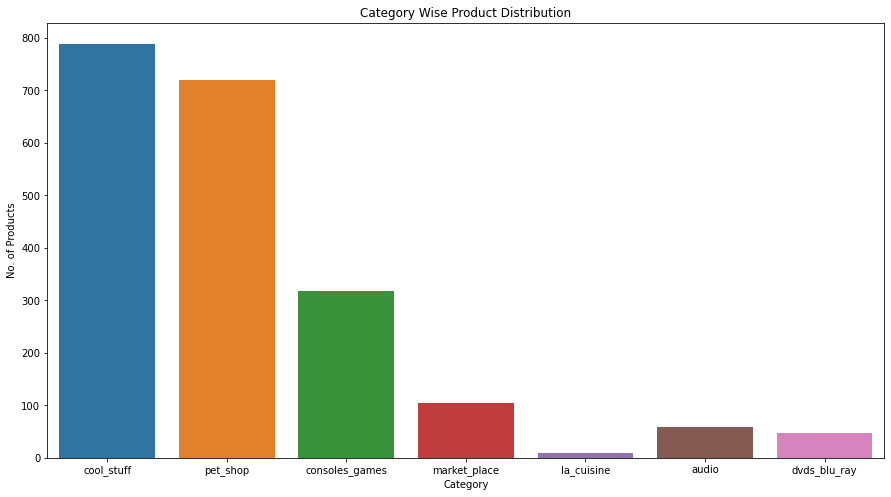

In [76]:
# plotting the category wise distribution of products
plt.figure(figsize=(15,8))
sns.countplot(x='product_category_name_english', data=df_products)
plt.title('Category Wise Product Distribution')
plt.xlabel('Category')
plt.ylabel('No. of Products')

Text(0.5, 0, 'Product Name Length')

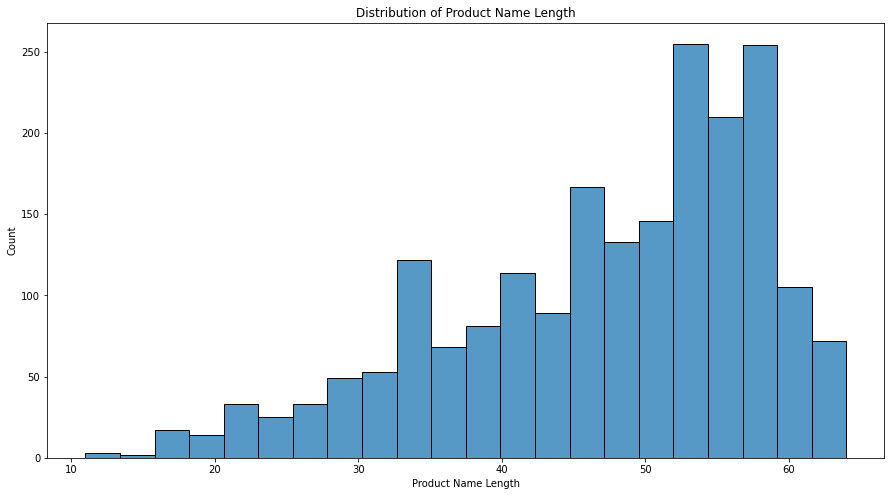

In [77]:
# plotting the distribution of product name length
plt.figure(figsize=(15,8))
sns.histplot(x='product_name_lenght', data=df_products)
plt.title('Distribution of Product Name Length')
plt.xlabel('Product Name Length')

Text(0.5, 0, 'Product Description Length')

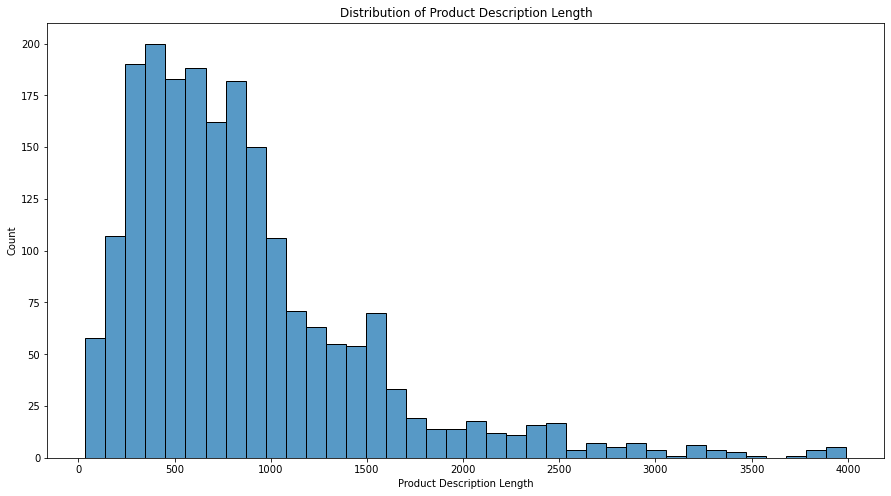

In [78]:
# plotting the distribution of product description length
plt.figure(figsize=(15,8))
sns.histplot(x='product_description_lenght', data=df_products)
plt.title('Distribution of Product Description Length')
plt.xlabel('Product Description Length')

Text(0.5, 0, 'Product Photos Quantity')

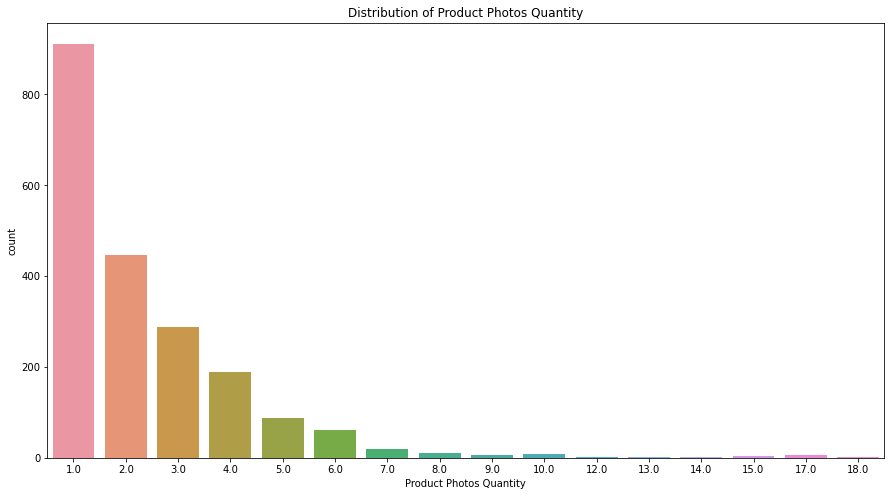

In [79]:
# plotting the distribution of product photos quantity
plt.figure(figsize=(15,8))
sns.countplot(x='product_photos_qty', data=df_products)
plt.title('Distribution of Product Photos Quantity')
plt.xlabel('Product Photos Quantity')

In [80]:
# viewing the first 5 rows of the table
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [81]:
# checking for missing values
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Text(0, 0.5, 'No. of Sellers')

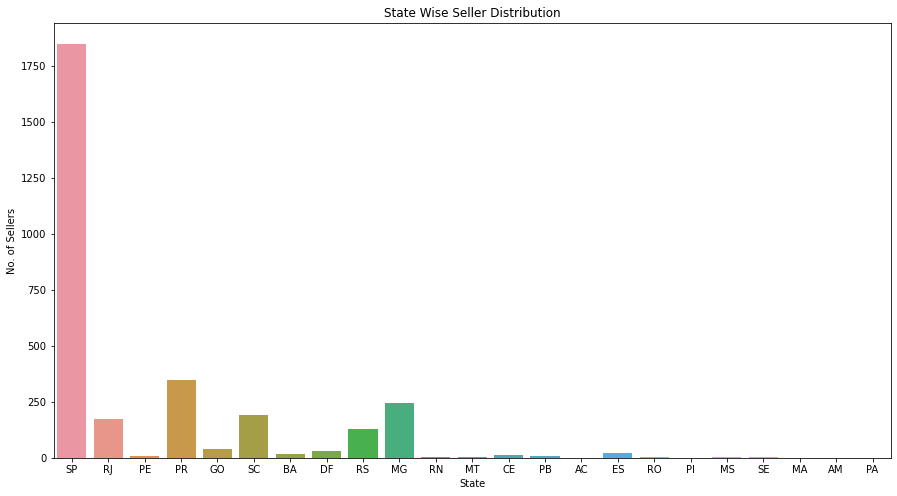

In [82]:
# plotting state wise seller distribution
plt.figure(figsize=(15,8))
sns.countplot(x='seller_state', data=df_sellers)
plt.title('State Wise Seller Distribution')
plt.xlabel('State')
plt.ylabel('No. of Sellers')

#### Merging the Datasets

After exploring and performing preprocessing on the datasets individually, we merge the datasets using multiple merge functions and common keys from the database schema. We use the 'inner' join strategy to avoid any missing values.

In [83]:
# merging the datasets
df = pd.merge(df_orders,df_order_pay, on='order_id', how='inner')
df = df.merge(df_reviews, on='order_id', how='inner')
df = df.merge(df_customers, on='customer_id', how='inner')
df = df.merge(df_item, on='order_id', how='inner')
df = df.merge(df_products, on='product_id', how='inner')
df = df.merge(df_sellers, on='seller_id', how='inner')
df = df.merge(df_geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

Next, we view the first few rows of the merged dataset using th head() function from the Pandas library.

In [84]:
# viewing the first few rows of the merged dataset
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff_app_pur,diff_car_app,...,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1073,3,...,20.0,pet_shop,31842,belo horizonte,MG,59296,-5.767733,-35.275467,sao goncalo do amarante,RN
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1073,3,...,20.0,pet_shop,31842,belo horizonte,MG,59296,-5.771622,-35.271325,sao goncalo do amarante,RN
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1073,3,...,20.0,pet_shop,31842,belo horizonte,MG,59296,-5.777424,-35.269238,sao goncalo do amarante,RN
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1073,3,...,20.0,pet_shop,31842,belo horizonte,MG,59296,-5.771259,-35.271049,sao goncalo do amarante,RN
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1073,3,...,20.0,pet_shop,31842,belo horizonte,MG,59296,-5.773971,-35.277776,sao goncalo do amarante,RN
